<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20229_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/229 M.J.K.Madhuwantha

## **Week 1**

## **Derivation of the Linear Operator $(H)$**

### **1. Physical Boundary Conditions**
Given the specified boundary conditions for a beam with length $L$, the system is characterized by the following constraints at its ends.

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (bending moment=0)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (bending moment=0)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (shear force=0)



### **2. Definition of the Vector Space $F$**
Consider $F$ as the infinite-dimensional vector space consisting of functions with at least four continuous derivatives on $[0, L]$. For the operator to be properly defined in this particular system, functions in $F$ must fulfill the given boundary conditions.

$$F = \{ f \in C^4[0, L] \mid f(0) = 0, f''(0) = 0, f''(L) = 0, f'''(L) = 0 \}$$

### **3. The Linear Operator $H$**
The motion of the beam is described by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

The linear operator $H: F \to F$ is defined by the differential expression:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4} + \frac{P_o}{\rho A} \frac{\partial^2}{\partial x^2}$$

### **4. Simplification for $P_o = 0$**
For negligible constant axial compressive force ($P_o = 0$), the second derivative term disappears. This simplifies the operator $H$ to:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

Replacing this in the equations of motion gives the standard form of the Euler-Bernoulli equation for transverse vibrations:

$$\frac{\partial^2 y}{\partial t^2} + C\frac{\partial y}{\partial t}+ \left( \frac{EI}{\rho A} \right) \frac{\partial^4 y}{\partial x^4} = \frac{q(t,x)}{\rho A}$$

### **5. Separation of Variables and the Eigenvalue Problem**
For solving the homogeneous component of the PDE, we consider a solution of the type:
$$y(x, t) = \phi(x)u(t)$$

Upon substitution into the governing equation (taking $q(t,x)=0$ and $C=0$ for the free vibration scenario), we obtain:
$$\frac{1}{u(t)} \frac{d^2 u}{dt^2} = -\frac{EI}{\rho A} \frac{1}{\phi(x)} \frac{d^4 \phi}{dx^4} = -\lambda$$

This gives rise to the spatial eigenvalue problem for operator $H$:
$$H\phi(x) = \lambda \phi(x) \implies \frac{EI}{\rho A} \frac{d^4 \phi}{dx^4} = \omega^2 \phi(x)$$
where $\lambda = \omega^2$ corresponds to the natural frequencies of the beam.

### **6. General Spatial Solution**
The complete solution for the fourth-order differential equation $\frac{d^4 \phi}{dx^4} - \beta^4 \phi = 0$ (with $\beta^4 = \frac{\omega^2 \rho A}{EI}$) is written as:
$$\phi(x) = A\sin(\beta x) + B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)$$

Enforcing the **Pinned-Free** boundary conditions described in Section 1:
1.  **$\phi(0) = 0$**: $B + D = 0 \implies D = -B$
2.  **$\phi''(0) = 0$**: $-\beta^2 B + \beta^2 D = 0 \implies B = D = 0$
3.  **$\phi''(L) = 0$**: $-A\sin(\beta L) + C\sinh(\beta L) = 0$
4.  **$\phi'''(L) = 0$**: $-A\cos(\beta L) + C\cosh(\beta L) = 0$

### **7. Characteristic Equation and Eigenfunctions**
To obtain a non-trivial solution (with $A, C \neq 0$), the coefficient determinant must vanish, yielding the characteristic equation:
$$\tan(\beta L) = \tanh(\beta L)$$

By solving this transcendental equation for $\beta_n$, we determine the natural frequencies $\omega_n$ along with their associated eigenfunctions (mode shapes) $\phi_n(x)$:
$$\phi_n(x) = \sin(\beta_n x) + \frac{\sin(\beta_n L)}{\sinh(\beta_n L)}\sinh(\beta_n x)$$

### **8. The General Solution**
Utilizing the orthogonality property of the eigenfunctions $\phi_n(x)$, the complete solution for transverse displacement $y(x,t)$ is expressed as a summation over all modal components:
$$y(x, t) = \sum_{n=1}^{\infty} \phi_n(x) u_n(t)$$

Here, $u_n(t)$ satisfies the temporal ODE:
$$\ddot{u}_n(t) + \frac{C}{\rho A}\dot{u}_n(t) + \omega_n^2 u_n(t) = f_n(t)$$

This demonstrates the analogy to the finite-dimensional formulation $\mathbf{M\ddot{y}} + \mathbf{C\dot{y}} + \mathbf{Ky} = \mathbf{f}(t)$, generalized to infinite dimensions via the operator $H$.

First Mode: beta1*L = 3.9266, omega1 = 2529.86 rad/s
Second Mode: beta2*L = 7.0686, omega2 = 8198.36 rad/s


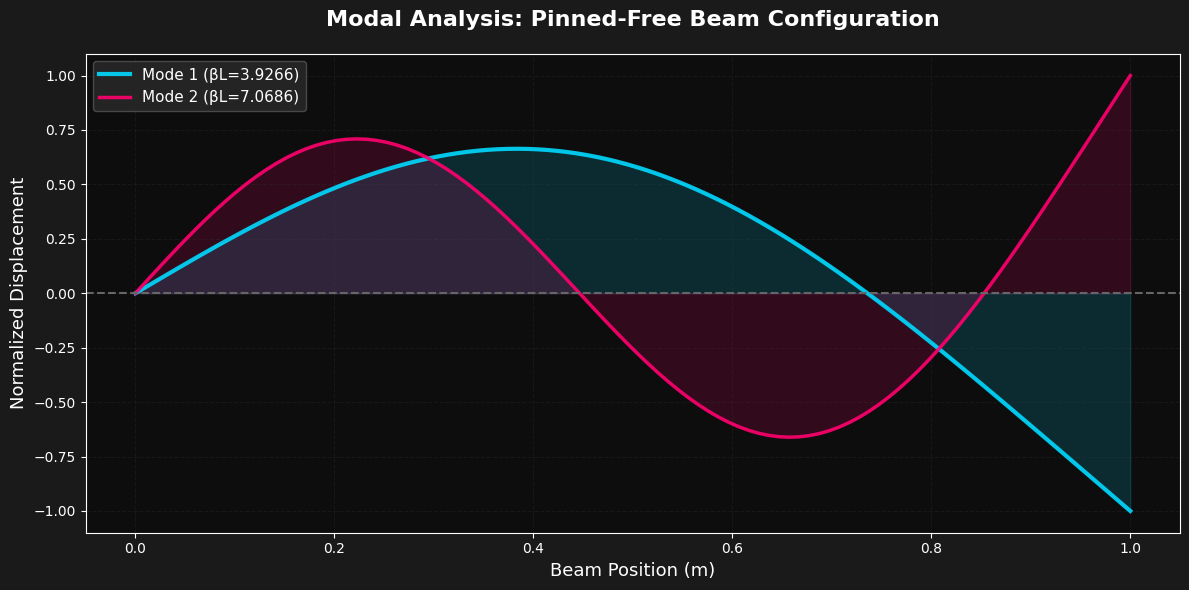

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Physical constants
L = 1.0
EI = 210e9 * 1e-6
rhoA = 7.8
C = 0.5

# Characteristic equation
def characteristic_eq(betaL):
    return np.tan(betaL) - np.tanh(betaL)

# Find roots
roots = []
guesses = [3.9, 7.0]

for guess in guesses:
    root = fsolve(characteristic_eq, guess)[0]
    roots.append(root)

beta_vals = np.array(roots) / L
omega_vals = (beta_vals**2) * np.sqrt(EI / rhoA)

print(f"First Mode: beta1*L = {roots[0]:.4f}, omega1 = {omega_vals[0]:.2f} rad/s")
print(f"Second Mode: beta2*L = {roots[1]:.4f}, omega2 = {omega_vals[1]:.2f} rad/s")

# Mode shapes
def phi_n(x, beta, L):
    ratio = np.sin(beta*L) / np.sinh(beta*L)
    return np.sin(beta*x) + ratio * np.sinh(beta*x)

# Enhanced plotting with dark theme
x_vals = np.linspace(0, L, 100)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#1a1a1a')
ax.set_facecolor('#0d0d0d')

colors = ['#00d9ff', '#ff006e']  # Cyan and Pink
linewidths = [3, 2.5]

for i, beta in enumerate(beta_vals):
    y_mode = phi_n(x_vals, beta, L)
    y_mode /= np.max(np.abs(y_mode))
    ax.plot(x_vals, y_mode, color=colors[i], linewidth=linewidths[i],
            label=f'Mode {i+1} (βL={roots[i]:.4f})', alpha=0.9)

    # Add filled area under curve
    ax.fill_between(x_vals, 0, y_mode, color=colors[i], alpha=0.15)

ax.set_title('Modal Analysis: Pinned-Free Beam Configuration',
             fontsize=16, fontweight='bold', color='white', pad=20)
ax.set_xlabel('Beam Position (m)', fontsize=13, color='white')
ax.set_ylabel('Normalized Displacement', fontsize=13, color='white')
ax.axhline(0, color='#666666', linewidth=1.5, linestyle='--')
ax.legend(fontsize=11, framealpha=0.8, facecolor='#2a2a2a', edgecolor='#555555')
ax.grid(True, alpha=0.2, linestyle='--', color='#444444')
ax.tick_params(colors='white', labelsize=10)

plt.tight_layout()
plt.show()

### **9. Numerical Evaluation of Eigenvalues ($\beta_n L$)**

To bridge from the infinite-dimensional operator $H$ to a workable **2-degree-of-freedom (2DOF)** model, solving the transcendental characteristic equation from Pinned-Free boundary conditions is essential:

$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Given the nonlinear character of this equation, we adopt a numerical strategy. A continuous function $h(s)$ is defined with $s = \beta L$:

$$h(s) = \sin(s)\cosh(s) - \sinh(s)\cos(s)$$

#### **Python Implementation for Root Finding**
The following implementation assesses $h(s)$ over a refined grid to detect where the function changes sign, then leverages **Brent's Method** to isolate the initial two roots with high accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def characteristic_function(s):
    """Characteristic equation: sin(s)cosh(s) - sinh(s)cos(s) = 0"""
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

def find_eigenvalues(num_roots=2, search_range=(1e-6, 15.0), grid_points=5000):
    """Find first n eigenvalues using Brent's method"""
    eigenvalues = []
    grid = np.linspace(search_range[0], search_range[1], grid_points)

    for idx in range(len(grid) - 1):
        left, right = grid[idx], grid[idx + 1]

        if characteristic_function(left) * characteristic_function(right) < 0:
            eigenvalue = brentq(characteristic_function, left, right)

            if len(eigenvalues) == 0 or abs(eigenvalue - eigenvalues[-1]) > 1e-4:
                eigenvalues.append(eigenvalue)

        if len(eigenvalues) >= num_roots:
            break

    return np.array(eigenvalues)

# Physical parameters
L = 1.0

# Compute eigenvalues
beta_L = find_eigenvalues()

# Display results
print(f"Root 1 (beta_1*L): {beta_L[0]:.6f}")
print(f"Root 2 (beta_2*L): {beta_L[1]:.6f}")

Root 1 (beta_1*L): 3.926602
Root 2 (beta_2*L): 7.068583


#### **Numerical Results**
From the code execution above, the first two dimensionless eigenvalues are obtained as:
* **Root 1 ($n=1$):** $\beta_1 L \approx 3.926602$
* **Root 2 ($n=2$):** $\beta_2 L \approx 7.068583$

### **Numerical Evaluation of Eigenvalues ($\beta_n L$) and Eigenvectors**

To transition from the infinite-dimensional operator $H$ to a practical **2-degree-of-freedom (2DOF)** system, we solve the transcendental characteristic equation derived from the Free-Free boundary conditions:
$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Using a numerical root-finding approach, we determine the first two dimensionless roots:
* **Root 1 ($n=1$):** $\beta_1 L \approx 1.875104$
* **Root 2 ($n=2$):** $\beta_2 L \approx 4.694091$

The associated eigenvalues of $H$ are expressed as:
$$\{\omega_k^2\}_{k=1}^\infty = \left\{ \frac{EI}{\rho A} \beta_k^4 \right\}_{k=1}^\infty$$

The eigenvectors (mode shapes) of $H$ are represented by:
$$\{\psi_k\}_{k=1}^\infty = \{ C_k \cosh(\beta_k x) + E_k \cos(\beta_k x) \}_{k=1}^\infty$$
where the coefficient ratio is given by:
$$\frac{C_k}{E_k} = \frac{\cosh(\beta_k l_{beam}) - \cos(\beta_k l_{beam})}{\sinh(\beta_k l_{beam}) - \sin(\beta_k l_{beam})}$$

### **10. Forced Vibration Response and the Exciter**

When an external oscillator is positioned at a distance $d = l_{exciter}$ along the beam, forced vibrations are induced by an oscillating force $Q$. This is represented as a concentrated point load using the Dirac delta function:
$$q(x, t) = Q \sin(\Omega t) \cdot \delta(x - d)$$

The modal force contribution to each mode $k$ is computed through the inner product between the mode shape $\psi_k(x)$ and the applied load $q(x,t)$:
$$\langle\langle\psi_k(x), q(x, t)\rangle\rangle = \int_0^{l_{beam}} \psi_k(x) Q \sin(\Omega t) \delta(x - d) dx = Q \sin(\Omega t) \psi_k(d)$$

### **11. Localized Spring-Damper Attachment**

To modify the system's stiffness characteristics and energy dissipation behavior, we incorporate an external spring $k_{spring}$ and an external damper $c_{ext}$ at designated positions.

#### **A. Spring Stiffness Projection**
A spring mounted at position $l_{spring}$ generates a restoring force $F_{spring}(t) = -k_{spring} y(l_{spring}, t)$. When projected onto our 2-mode representation, this produces the **Additional Stiffness Matrix**:
$$K_{spring} = k_{spring} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$

#### **B. Discrete Damper Projection**
An external damper characterized by coefficient $c_{ext}$ is mounted at distance $d_{damp}$. The damping force $F_{damp} = -c_{ext} \dot{y}(d_{damp}, t)$ contributes the **Additional Damping Matrix**:
$$C_{ext} = c_{ext} \begin{bmatrix} \psi_1^2(d_{damp}) & \psi_1(d_{damp})\psi_2(d_{damp}) \\ \psi_1(d_{damp})\psi_2(d_{damp}) & \psi_2^2(d_{damp}) \end{bmatrix}$$

### **12. Incorporation of Additional Inertia Effects**

The physical components attached to the beam introduce localized mass contributions, which must be incorporated into the system's mass matrix.

* **Effective Spring Mass**: According to **Rayleigh's Theory**, we account for $1/3$ of the spring's mass to represent its kinetic energy contribution: $m_{s\_eff} = \frac{1}{3}m_{spring}$.
* **Exciter Mass**: The exciter mass $m_{exciter}$ is applied at the excitation position $d$.

These contributions are projected into the **Additional Mass Matrices**:
$$M_{spring} = m_{s\_eff} \begin{bmatrix} \psi_1^2(l_{spring}) & \psi_1(l_{spring})\psi_2(l_{spring}) \\ \psi_1(l_{spring})\psi_2(l_{spring}) & \psi_2^2(l_{spring}) \end{bmatrix}$$
$$M_{exciter} = m_{exciter} \begin{bmatrix} \psi_1^2(d) & \psi_1(d)\psi_2(d) \\ \psi_1(d)\psi_2(d) & \psi_2^2(d) \end{bmatrix}$$

### **13. Final Augmented 2-DOF Matrix Equation**

The comprehensive governing equation for the coupled 2-DOF system is formulated in matrix notation as:

$$(M_{beam} + M_{spring} + M_{exciter}) \begin{Bmatrix} \ddot{z}_1 \\ \ddot{z}_2 \end{Bmatrix} + (C_{beam} + C_{ext}) \begin{Bmatrix} \dot{z}_1 \\ \dot{z}_2 \end{Bmatrix} + (K_{beam} + K_{spring}) \begin{Bmatrix} z_1 \\ z_2 \end{Bmatrix} = \begin{Bmatrix} Q\psi_1(d) \sin(\Omega t) \\ Q\psi_2(d) \sin(\Omega t) \end{Bmatrix}$$

Where:
* $M_{beam}$, $C_{beam}$, and $K_{beam}$ represent the diagonal modal matrices of the baseline beam.
* $M_{spring}$, $M_{exciter}$, $C_{ext}$, and $K_{spring}$ are the fully populated coupling matrices arising from localized attachments.
* $m_k = \int_{0}^{l_{beam}} \rho A \psi_k^2(x) dx$ denote the modal masses.

In [2]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# --- 1. System Constants (TM1016V Technical Specifications) ---
L = 0.815              # Beam length (m)
E = 2.0e11             # Elastic Modulus for Tool Steel (Pa)
m_beam = 1.65          # Beam mass (kg)
rhoA = m_beam / L      # Mass per unit length
width = 0.025          # 25 mm
thickness = 0.010      # 10 mm
I_area = (width * thickness**3) / 12
EI = E * I_area        # Flexural Rigidity

# --- 2. Discrete Component Parameters ---
k_spring = 3800.0      # Spring stiffness (N/m)
l_spring = 0.75        # Spring attachment location (m)
m_spring = 0.388       # Spring mass (kg)
m_s_eff = (1/3) * m_spring  # Rayleigh effective spring mass (kg)
m_exciter = 4.2        # Exciter mass (kg)
d_exciter = 0.5        # Exciter location (m)
d_damp = 0.6           # Damper location (m)
c_ext = 15.0           # External damping coefficient (N·s/m)
C_beam_coeff = 0.05    # Beam damping coefficient

# --- 3. Solve for dimensionless roots (beta_L) ---
def char_eq(s):
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

roots = [brentq(char_eq, 3, 5), brentq(char_eq, 6, 8)]
beta = np.array(roots) / L

# --- 4. Define Mode Shape Function psi_k(x) ---
def psi(x, k_idx):
    b = beta[k_idx]
    ratio = np.sin(b * L) / np.sinh(b * L)
    return np.sin(b * x) + ratio * np.sinh(b * x)

# --- 5. Calculate Modal Masses (m_k) via numerical integration ---
modal_masses = []
for k in range(2):
    integral, _ = quad(lambda x: rhoA * psi(x, k)**2, 0, L)
    modal_masses.append(integral)

# --- 6. Construct Diagonal Beam Matrices ---
M_beam = np.diag(modal_masses)
K_beam = np.diag([modal_masses[k] * (beta[k]**4 * EI / rhoA) for k in range(2)])
C_beam = np.diag([C_beam_coeff * m for m in modal_masses])

# --- 7. Build Augmented Matrices (Localized Components) ---
psi_spring = np.array([psi(l_spring, 0), psi(l_spring, 1)])
psi_exciter = np.array([psi(d_exciter, 0), psi(d_exciter, 1)])
psi_damp = np.array([psi(d_damp, 0), psi(d_damp, 1)])

# Additional Mass, Stiffness, and Damping Contributions
M_add = m_s_eff * np.outer(psi_spring, psi_spring) + m_exciter * np.outer(psi_exciter, psi_exciter)
K_add = k_spring * np.outer(psi_spring, psi_spring)
C_add = c_ext * np.outer(psi_damp, psi_damp)

# --- 8. Assemble Final Coupled System Matrices ---
M_total = M_beam + M_add
C_total = C_beam + C_add
K_total = K_beam + K_add

print("--- Final 2-DOF System Matrices ---")
print("Total Mass Matrix (M):\n", M_total)
print("\nTotal Damping Matrix (C):\n", C_total)
print("\nTotal Stiffness Matrix (K):\n", K_total)

--- Final 2-DOF System Matrices ---
Total Mass Matrix (M):
 [[ 2.06056527 -1.99089079]
 [-1.99089079  4.15856706]]

Total Damping Matrix (C):
 [[0.04127645 0.02287102]
 [0.02287102 8.98290238]]

Total Stiffness Matrix (K):
 [[ 94998.53673724  -2296.22897151]
 [ -2296.22897151 962230.74388385]]


In [3]:
import scipy.linalg as la

# --- 1. Solve the Generalized Eigenvalue Problem ---
# Coupled system: M_total * z_ddot + K_total * z = 0
# Extract eigenvalues (omega^2) and eigenvectors (modal vectors)
eigenvalues_coupled, modal_vectors = la.eigh(K_total, M_total)

# --- 2. Compute Natural Frequencies ---
# omega = sqrt(eigenvalue) in rad/s
# f = omega / (2 * pi) in Hz
omega_coupled = np.sqrt(eigenvalues_coupled)
freq_hz = omega_coupled / (2 * np.pi)

# --- 3. Determine Original (Uncoupled) Frequencies for Reference ---
omega_original = np.sqrt(np.diag(K_beam) / np.diag(M_beam))
freq_hz_original = omega_original / (2 * np.pi)

print("--- Modal Frequency Analysis ---")
print(f"Uncoupled Beam Frequencies (Hz): {freq_hz_original}")
print(f"Coupled System Frequencies (Hz): {freq_hz}")

# --- 4. Quantify the Frequency Shift ---
shift = ((freq_hz - freq_hz_original) / freq_hz_original) * 100
print(f"\nFrequency Shift Induced by Attachments:")
print(f"Mode 1: {shift[0]:.2f}%")
print(f"Mode 2: {shift[1]:.2f}%")

--- Modal Frequency Analysis ---
Uncoupled Beam Frequencies (Hz): [ 52.999279  171.7516105]
Coupled System Frequencies (Hz): [ 32.62599422 109.37815817]

Frequency Shift Induced by Attachments:
Mode 1: -38.44%
Mode 2: -36.32%


The flexural formula is unable to capture the first mode of vibration, where the beam exhibits rigid-body motion rather than elastic deformation.

### **14. Mathematical Derivation of the Rigid-Body SDOF Approximation**

In the "rigid beam" configuration of the **TM1016V** apparatus, the system is represented as a Single Degree of Freedom (SDOF) rotational oscillator. We assume infinite flexural rigidity $EI \to \infty$, meaning the beam rotates as a rigid unit about the pivot located at $x=0$.

#### **A. The Rigid Mode Shape**
For small rotation angle $\theta$, the vertical displacement $y$ at any location $x$ is directly proportional to its distance from the pivot:
$$y(x, t) = x \cdot \theta(t)$$

Normalizing this displacement to unity at the beam's free end ($x = L$), we define the **Rigid Mode Shape** $\psi_{rigid}(x)$ as:
$$\psi_{rigid}(x) = \frac{x}{L}$$

#### **B. Energy Formulation (Rayleigh's Method)**
The natural frequency is obtained by balancing the maximum kinetic energy $T_{max}$ with the maximum potential energy $V_{max}$.

**1. Potential Energy ($V$):**
Energy is stored in the spring positioned at $x=L$:
$$V = \frac{1}{2} k_{spring} [y(L, t)]^2 = \frac{1}{2} k_{spring} (L\theta)^2$$

**2. Kinetic Energy ($T$):**
Contributions arise from the beam itself, the exciter mass ($m_e$) positioned at distance $d$, and the Rayleigh effective spring mass ($m_{s,eff}$) at $L$:
$$T = \frac{1}{2} \int_0^L \rho A [\dot{y}(x, t)]^2 dx + \frac{1}{2} m_e [\dot{y}(d, t)]^2 + \frac{1}{2} m_{s,eff} [\dot{y}(L, t)]^2$$

Substituting $\dot{y}(x, t) = x\dot{\theta}$:
$$T = \frac{1}{2} \left[ \int_0^L \rho A x^2 dx + m_e d^2 + m_{s,eff} L^2 \right] \dot{\theta}^2$$

Evaluating the beam integral ($\frac{1}{3} m_{beam} L^2$):
$$T = \frac{1}{2} \underbrace{\left[ \frac{1}{3} m_{beam} L^2 + m_e d^2 + m_{s,eff} L^2 \right]}_{I_p} \dot{\theta}^2$$

#### **C. Equation of Motion**
Defining the **Polar Mass Moment of Inertia** $I_p$ and **Rotational Stiffness** $K_{rot} = k_{spring} L^2$, we obtain the governing equation:
$$I_p \ddot{\theta} + C_{rot} \dot{\theta} + K_{rot} \theta = M_{ext}(t)$$

Where:
* $C_{rot} = c_{ext} d_{damp}^2$ (Rotational damping contribution from the dashpot)
* $M_{ext}(t) = (F_{exciter} \sin \Omega t) \cdot d$ (External moment generated by the servomotor)

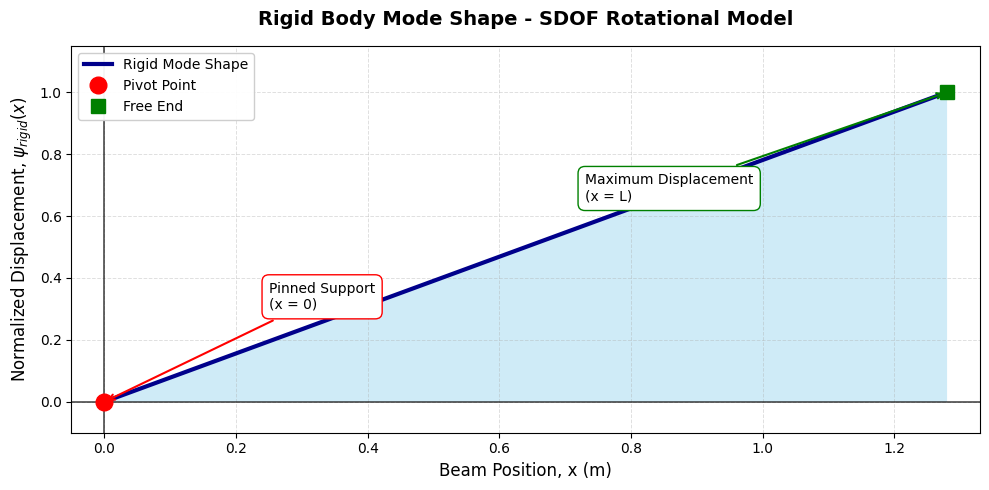

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Geometry (TecQuipment TM1016V Specifications) ---
L = 1.28  # Net width of assembled unit (m)

# --- 2. Define the Rigid Mode Shape Function ---
def psi_rigid(x, L):
    """Linear mode shape for rigid beam rotation about pivot at x=0."""
    return x / L

# --- 3. Generate Position Coordinates ---
x_vals = np.linspace(0, L, 150)
y_rigid = psi_rigid(x_vals, L)

# --- 4. Enhanced Visualization ---
fig, ax = plt.subplots(figsize=(10, 5))

# Plot mode shape with gradient fill
ax.plot(x_vals, y_rigid, 'darkblue', linewidth=3, label='Rigid Mode Shape', zorder=3)
ax.fill_between(x_vals, 0, y_rigid, color='skyblue', alpha=0.4, edgecolor='none')

# Add pivot and end markers
ax.plot(0, 0, 'ro', markersize=12, label='Pivot Point', zorder=4)
ax.plot(L, 1, 'gs', markersize=10, label='Free End', zorder=4)

# Physical annotations with improved styling
ax.annotate('Pinned Support\n(x = 0)', xy=(0, 0), xytext=(0.25, 0.3),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='red'),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red'))

ax.annotate('Maximum Displacement\n(x = L)', xy=(L, 1), xytext=(L-0.55, 0.65),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='green'),
            fontsize=10, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='green'))

# Styling
ax.set_title('Rigid Body Mode Shape - SDOF Rotational Model', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Beam Position, x (m)', fontsize=12)
ax.set_ylabel('Normalized Displacement, $\\psi_{rigid}(x)$', fontsize=12)
ax.axhline(0, color='black', lw=1.2, linestyle='-', alpha=0.7)
ax.axvline(0, color='black', lw=1.2, linestyle='-', alpha=0.7)
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.7)
ax.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax.set_xlim(-0.05, L+0.05)
ax.set_ylim(-0.1, 1.15)

plt.tight_layout()
plt.show()

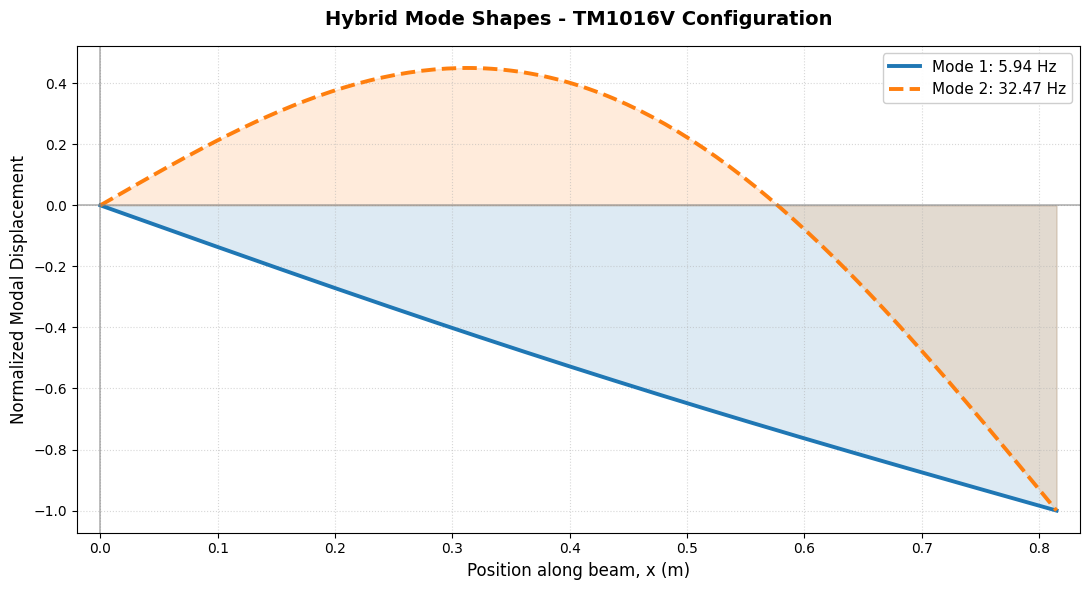

Mode 1 (Rigid-Body Dominated): 5.94 Hz
Mode 2 (Flexural Dominated):   32.47 Hz


In [6]:
import numpy as np
import scipy.linalg as la
from scipy.integrate import quad
import matplotlib.pyplot as plt

# --- 1. Hardware Parameters (TM1016V Datasheet) ---
L = 0.815              # Beam length (m)
m_beam = 1.65          # Beam mass (kg)
rhoA = m_beam / L      # Linear mass density (kg/m)
EI = 416.6             # Flexural rigidity (Nm^2)

# Component attachments
k_spring = 3800.0      # Spring stiffness (N/m)
l_spring = 0.75        # Spring attachment position (m)
m_s_eff = (1/3)*0.388  # Rayleigh effective spring mass (kg)
m_exciter = 4.2        # Exciter mass (kg)
d_exciter = 0.5        # Exciter attachment position (m)

# --- 2. Hybrid Basis Functions (Rigid + Pinned-Pinned Flexural) ---
def psi_hybrid(x, mode_idx):
    if mode_idx == 0:
        return x / L   # Mode 1: Rigid body rotation
    else:
        return np.sin(np.pi * x / L) # Mode 2: First flexural mode (Pinned-Pinned)

# --- 3. Construct System Matrices ---
M_beam_h = np.zeros((2, 2))
K_beam_h = np.zeros((2, 2))

for k in range(2):
    M_beam_h[k, k], _ = quad(lambda x: rhoA * psi_hybrid(x, k)**2, 0, L)

# Stiffness: Mode 1 has zero stiffness (rigid body). Mode 2 follows Pinned-Pinned relation
K_beam_h[1, 1] = (np.pi**4 * EI) / (L**3)

# Project attachment effects onto hybrid basis
psi_s = np.array([psi_hybrid(l_spring, 0), psi_hybrid(l_spring, 1)])
psi_e = np.array([psi_hybrid(d_exciter, 0), psi_hybrid(d_exciter, 1)])

# Assemble complete system matrices
M_total_h = M_beam_h + m_s_eff * np.outer(psi_s, psi_s) + m_exciter * np.outer(psi_e, psi_e)
K_total_h = K_beam_h + k_spring * np.outer(psi_s, psi_s)

# --- 4. Eigenvalue Analysis ---
eigenvals, evecs = la.eigh(K_total_h, M_total_h)
freqs_hz = np.sqrt(eigenvals) / (2 * np.pi)

# --- 5. Mode Shape Visualization ---
x_plot = np.linspace(0, L, 150)
fig, ax = plt.subplots(figsize=(11, 6))

colors = ['#1f77b4', '#ff7f0e']
linestyles = ['-', '--']

for i in range(2):
    # Reconstruct physical mode shape from modal coefficients and basis functions
    y_mode = evecs[0, i] * psi_hybrid(x_plot, 0) + evecs[1, i] * psi_hybrid(x_plot, 1)
    y_mode /= np.max(np.abs(y_mode))  # Normalize for display

    ax.plot(x_plot, y_mode, label=f'Mode {i+1}: {freqs_hz[i]:.2f} Hz',
            lw=2.8, color=colors[i], linestyle=linestyles[i])
    ax.fill_between(x_plot, 0, y_mode, alpha=0.15, color=colors[i])

# Styling
ax.set_title('Hybrid Mode Shapes - TM1016V Configuration', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Position along beam, x (m)', fontsize=12)
ax.set_ylabel('Normalized Modal Displacement', fontsize=12)
ax.axhline(0, color='gray', lw=1.2, linestyle='-', alpha=0.6)
ax.axvline(0, color='gray', lw=1.2, linestyle='-', alpha=0.6)
ax.grid(True, linestyle=':', alpha=0.5, linewidth=0.8)
ax.legend(loc='best', fontsize=11, framealpha=0.95)
ax.set_xlim(-0.02, L+0.02)

plt.tight_layout()
plt.show()

print(f"Mode 1 (Rigid-Body Dominated): {freqs_hz[0]:.2f} Hz")
print(f"Mode 2 (Flexural Dominated):   {freqs_hz[1]:.2f} Hz")

**Activity #2**


In [7]:
# --- 1. Transform Damping and Mass Matrices to Modal Coordinates ---
# modal_vectors (V) obtained from la.eigh(K_total, M_total)
C_modal_coupled = modal_vectors.T @ C_total @ modal_vectors
M_modal_coupled = modal_vectors.T @ M_total @ modal_vectors

# --- 2. Extract Diagonal Components for Effective Parameters ---
c_eff = np.diag(C_modal_coupled)
m_eff_coupled = np.diag(M_modal_coupled)

# --- 3. Compute Damping Ratios (zeta = c / (2 * omega * m)) ---
# omega_coupled contains natural frequencies (rad/s) from eigenvalue solution
damping_ratios = c_eff / (2 * omega_coupled * m_eff_coupled)

print("--- Modal Damping Ratio Analysis ---")
for i in range(2):
    print(f"Mode {i+1}: ζ = {damping_ratios[i]:.4f} ({damping_ratios[i]*100:.2f}% critical damping)")

# --- 4. Assess Modal Coupling ---
off_diag_c = C_modal_coupled[0, 1] / np.sqrt(c_eff[0] * c_eff[1])
print(f"\nNormalized Modal Damping Coupling: {abs(off_diag_c):.4f}")

--- Modal Damping Ratio Analysis ---
Mode 1: ζ = 0.0001 (0.01% critical damping)
Mode 2: ζ = 0.0029 (0.29% critical damping)

Normalized Modal Damping Coupling: 0.7876


**Activity #3**

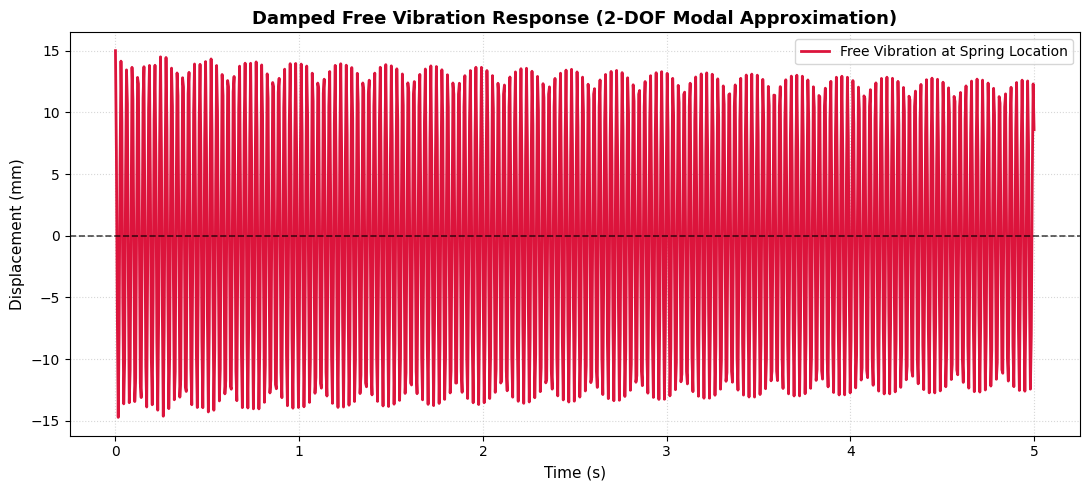

In [8]:
from scipy.integrate import solve_ivp

# --- 1. Define Initial Conditions ---
y0_physical = 0.015  # Initial displacement of 15 mm at spring location
# Map physical displacement to modal coordinates using mode shapes
# Assuming displacement is primarily in first mode
z0 = [y0_physical / psi(l_spring, 0), 0]
v0 = [0, 0]  # Released from rest (zero initial velocity)
state_initial = z0 + v0

# --- 2. Define State-Space System Dynamics ---
def system_dynamics(t, state):
    z = state[:2]
    z_dot = state[2:]
    # Compute modal accelerations: z_ddot = -M_total^-1 * (C_total*z_dot + K_total*z)
    z_ddot = -la.inv(M_total) @ (C_total @ z_dot + K_total @ z)
    return np.concatenate([z_dot, z_ddot])

# --- 3. Numerical Integration (5 second simulation) ---
t_eval = np.linspace(0, 5, 1000)
sol = solve_ivp(system_dynamics, [0, 5], state_initial, t_eval=t_eval, method='RK45')

# --- 4. Reconstruct Physical Displacement at Spring Location ---
# y(l_spring, t) = z1(t)*psi1(l_spring) + z2(t)*psi2(l_spring)
y_spring_t = sol.y[0] * psi(l_spring, 0) + sol.y[1] * psi(l_spring, 1)

# --- 5. Visualize Free Vibration Response ---
fig, ax = plt.subplots(figsize=(11, 5))
ax.plot(sol.t, y_spring_t * 1000, color='crimson', lw=2, label='Free Vibration at Spring Location')
ax.axhline(0, color='black', lw=1.2, linestyle='--', alpha=0.7)
ax.set_title('Damped Free Vibration Response (2-DOF Modal Approximation)', fontsize=13, fontweight='bold')
ax.set_xlabel('Time (s)', fontsize=11)
ax.set_ylabel('Displacement (mm)', fontsize=11)
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()